In [2]:
# Core data wrangling
import pandas as pd
import numpy as np

# Reading parquet files
import pyarrow.parquet as pq
import duckdb  # query parquet files directly with SQL

# Working with dates and times
from datetime import datetime, timedelta

# Static plots
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive plots and maps
import plotly.express as px
import plotly.graph_objects as go
import folium  # mapping
from folium.plugins import HeatMap

# Geospatial data
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Time Series / Forecasting
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm  # auto_arima

# Advanced models
import xgboost as xgb

from tqdm import tqdm
import missingno as msno



import streamlit as st

In [3]:
poke = pd.read_csv('pokemon_dataset.csv')
poke

,dex_number,name,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bio,hp,attack,defense,sp_attack,sp_defense,speed
0,#0001,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Bulbasaur is a dual-type Grass/Poison Pokémon ...,45,49,49,65,65,45
1,#0002,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Ivysaur is a dual-type Grass/Poison Pokémon in...,60,62,63,80,80,60
2,#0003,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Venusaur is a dual-type Grass/Poison Pokémon i...,80,82,83,100,100,80
3,#0004,Charmander,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,False,Charmander is a Fire-type Pokémon introduced i...,39,52,43,60,50,65
4,#0005,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,False,Charmeleon is a Fire-type Pokémon introduced i...,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,#1021,Raging Bolt,Electric,Dragon,Protosynthesis,NaN,NaN,NaN,NaN,False,Raging Bolt is a dual-type Electric/Dragon Par...,125,73,91,137,89,75
1021,#1022,Iron Boulder,Rock,Psychic,Quark,NaN,NaN,NaN,NaN,False,Iron Boulder is a Rock/Psychic Paradox Pokémon...,90,120,80,68,108,124
1022,#1023,Iron Crown,Steel,Psychic,Quark,NaN,NaN,NaN,NaN,False,Iron Crown is a dual-type Steel/Psychic Parado...,90,72,100,122,108,98
1023,#1024,Terapagos,Normal,NaN,Tera,NaN,NaN,NaN,NaN,True,Terapagos is a Normal-type Legendary Pokémon i...,90,65,85,65,85,60


In [4]:
poke = poke.drop(columns=['bio'])

In [5]:
poke.isna().sum()

dex_number          0
name                0
type_01             0
type_02           499
ability_01          0
ability_02        495
hidden_ability    169
egg_group_01      120
egg_group_02      745
is_legendary        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
dtype: int64

In [6]:
#Fill NaN values
poke['type_02'] = poke['type_02'].fillna('None')
poke['ability_02'] = poke['ability_02'].fillna('None')
poke['hidden_ability'] = poke['hidden_ability'].fillna('None')
poke['egg_group_01'] = poke['egg_group_01'].fillna('None')
poke['egg_group_02'] = poke['egg_group_02'].fillna('None')


In [7]:
poke['type_02'] = poke['type_02'].str.lstrip()

In [8]:
poke['BST'] = poke[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

### Breakdown of Pokemon by Type 1 and 2

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2710379255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_1_counts.index, y=type_1_counts.values, palette='viridis')


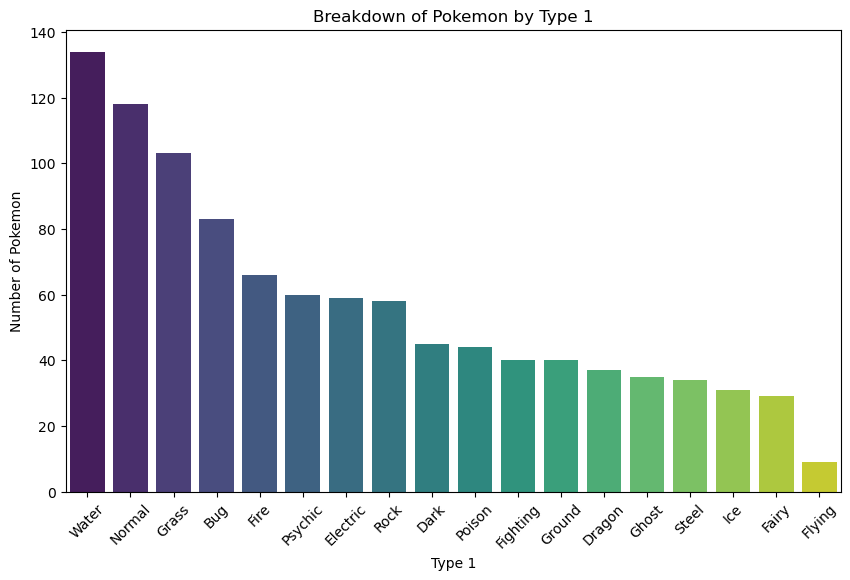

In [9]:
#Breakdown of Pokemon by Type 1
type_1_counts = poke['type_01'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_1_counts.index, y=type_1_counts.values, palette='viridis')
plt.title('Breakdown of Pokemon by Type 1')
plt.xlabel('Type 1')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45)
plt.show()

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/3364371170.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_2_counts.index, y=type_2_counts.values, palette='viridis')


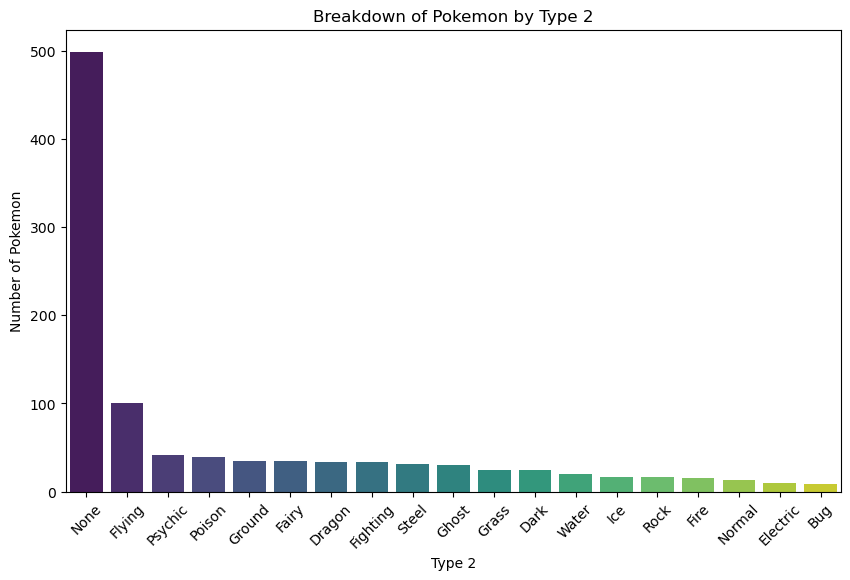

In [10]:
#Breakdown of Pokemon by type 2
type_2_counts = poke['type_02'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_2_counts.index, y=type_2_counts.values, palette='viridis')
plt.title('Breakdown of Pokemon by Type 2')
plt.xlabel('Type 2')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45)
plt.show()

### Breakdown of Pokemon by Ability

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/20575186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ability_1_counts.index, y=ability_1_counts.values, palette='viridis')


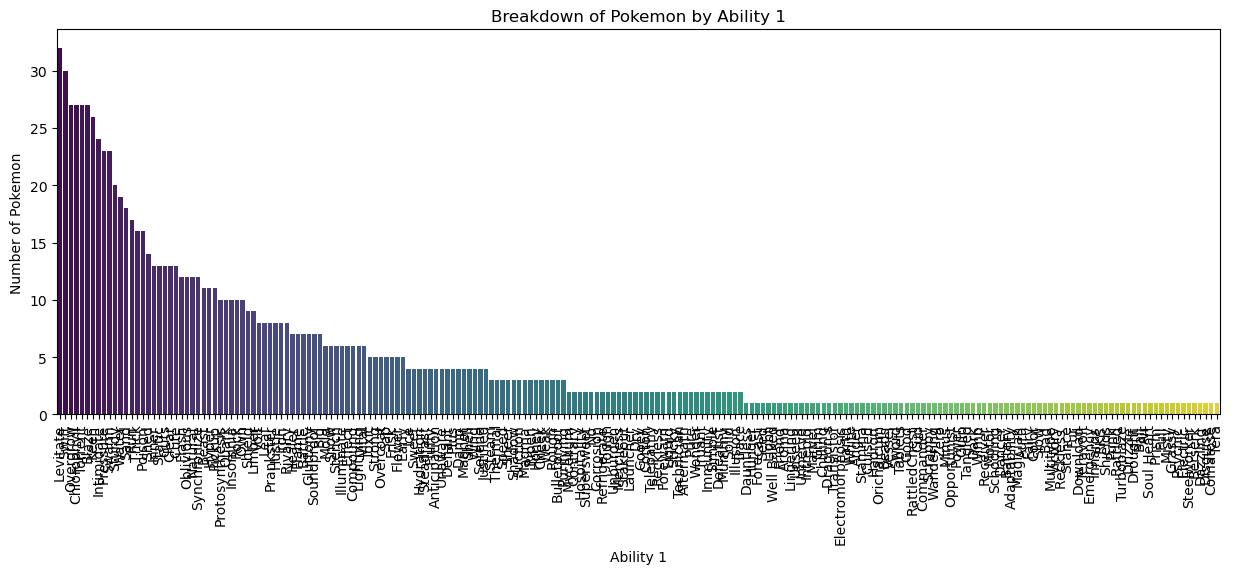

In [11]:
ability_1_counts = poke['ability_01'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(x=ability_1_counts.index, y=ability_1_counts.values, palette='viridis')
plt.title('Breakdown of Pokemon by Ability 1')
plt.xlabel('Ability 1')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=90)
plt.show()

In [12]:
ability_1_counts

ability_01
Levitate       32
Swift          30
Overgrow       27
Chlorophyll    27
Torrent        27
               ..
Berserk         1
Dazzling        1
Disguise        1
Comatose        1
Tera            1
Name: count, Length: 210, dtype: int64

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/1946634539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ability_2_counts.index, y=ability_2_counts.values, palette='viridis')


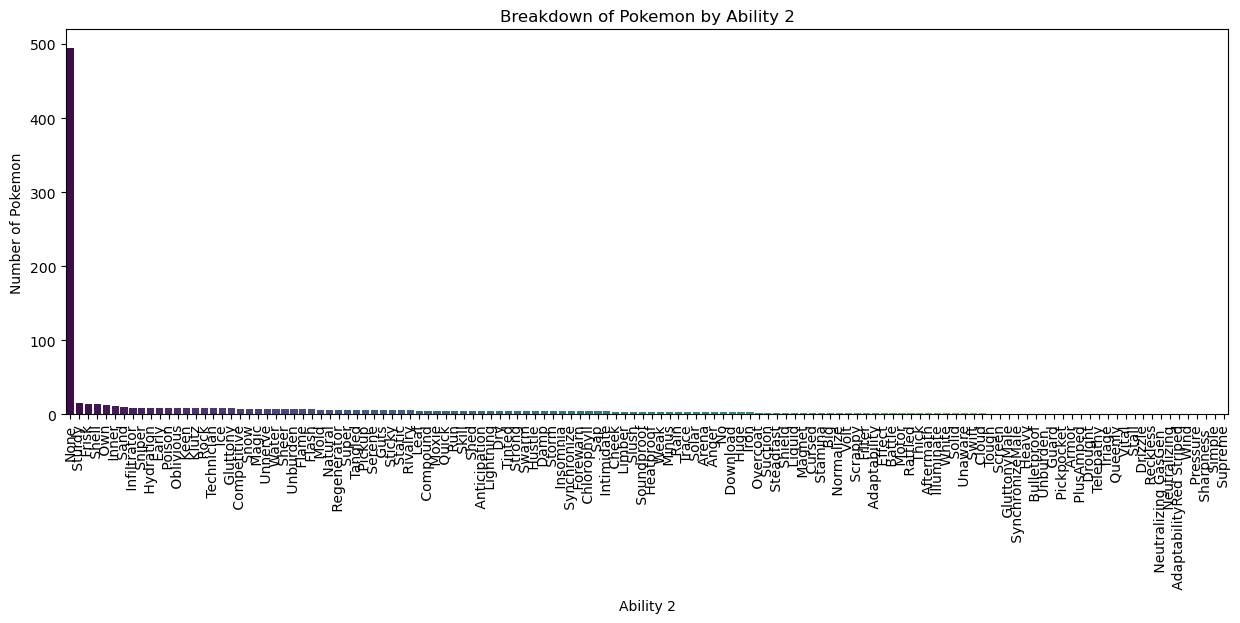

In [13]:
#Ability 2 breakdown
ability_2_counts = poke['ability_02'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(x=ability_2_counts.index, y=ability_2_counts.values, palette='viridis')
plt.title('Breakdown of Pokemon by Ability 2')
plt.xlabel('Ability 2')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=90)
plt.show()

### Most common type combo

In [14]:
#Type combo breakdown
type_combos = poke.groupby(['type_01', 'type_02']).size().reset_index(name='count').sort_values(by='count', ascending=False)
type_combos

,type_01,type_02,count
136,Normal,None,75
198,Water,None,74
106,Grass,None,47
159,Psychic,None,39
75,Fire,None,36
...,...,...,...
82,Flying,Dark,1
81,Fire,Water,1
80,Fire,Steel,1
79,Fire,Rock,1


/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/228001892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_type_combos.index, y=top_15_type_combos.values, palette='viridis')


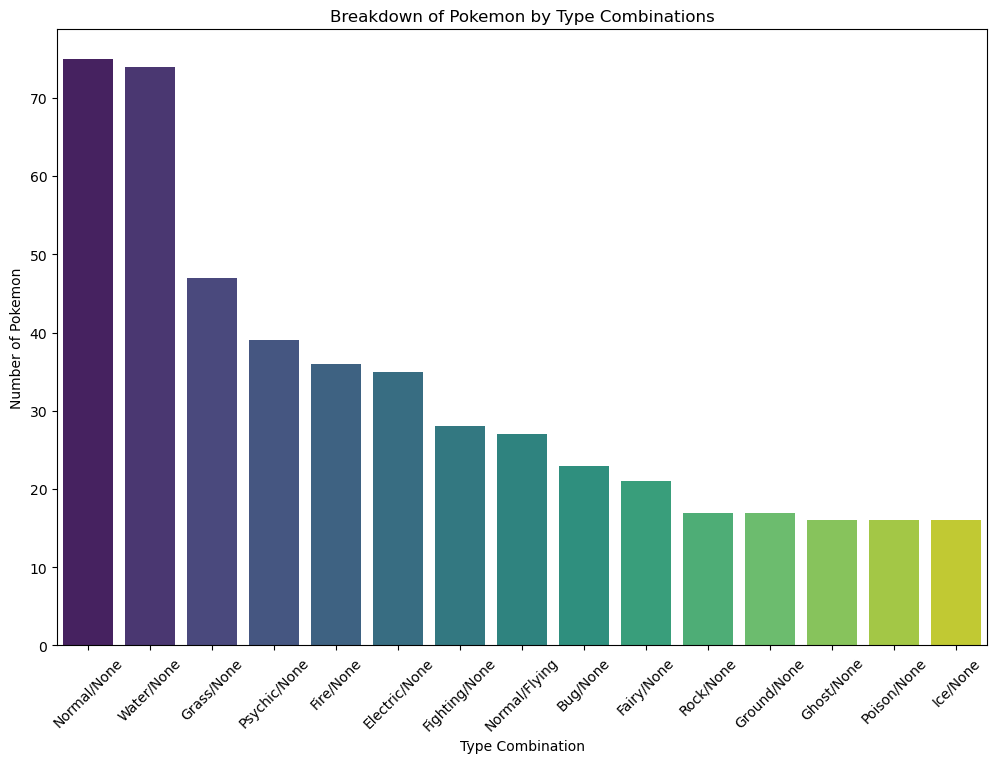

In [15]:
#Plot type combos
poke['type_combo'] = poke['type_01'] + '/' + poke['type_02']
type_combo_counts = poke['type_combo'].value_counts()
top_15_type_combos = type_combo_counts.head(15)
plt.figure(figsize=(12,8))
sns.barplot(x=top_15_type_combos.index, y=top_15_type_combos.values, palette='viridis')
plt.title('Breakdown of Pokemon by Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45)
plt.show()

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2199623546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_type_combos.index, y=bottom_10_type_combos.values, palette='viridis')


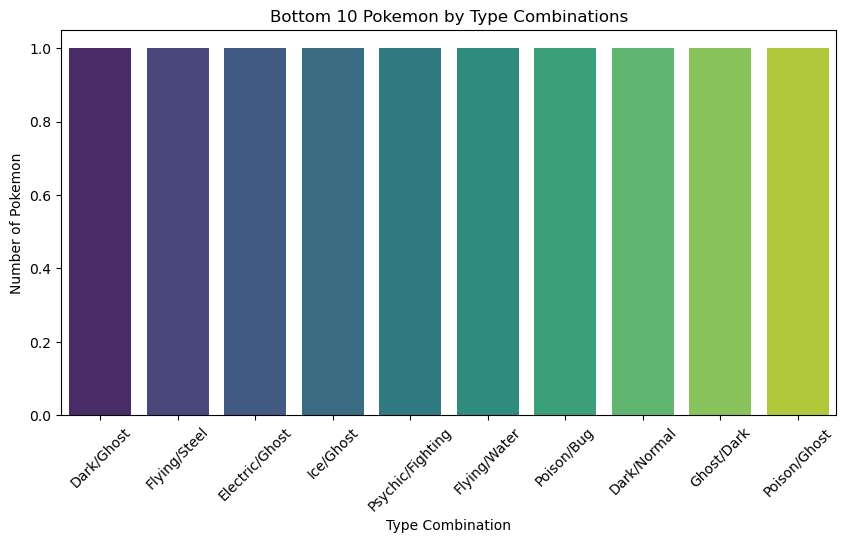

In [16]:
#Bottom 10 type combos
bottom_10_type_combos = type_combo_counts.tail(10)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_10_type_combos.index, y=bottom_10_type_combos.values, palette='viridis')
plt.title('Bottom 10 Pokemon by Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Number of Pokemon')
plt.xticks(rotation=45)
plt.show()


### Stats breakdown

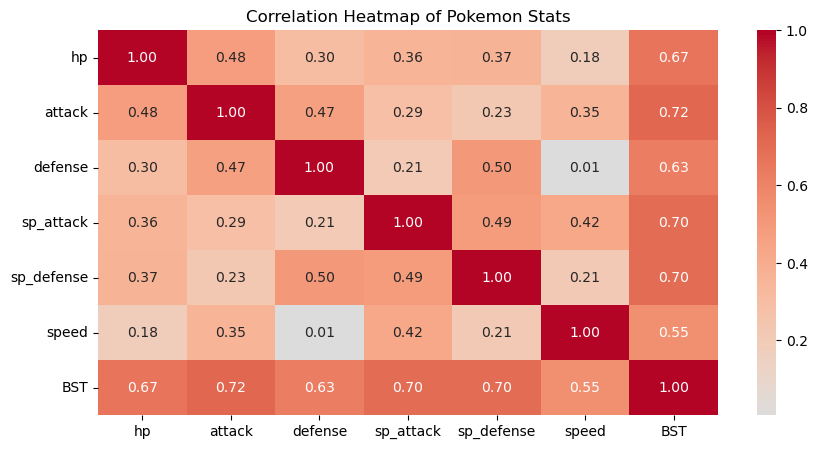

In [17]:
#Stats Correlation Heatmap
stat_cols = poke.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 5))
sns.heatmap(stat_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Pokemon Stats')
plt.show()

### Scatter plots

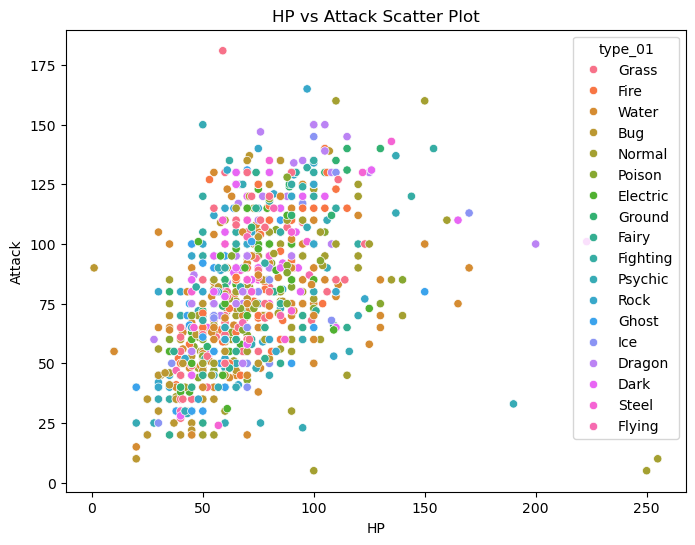

In [18]:
#HP vs Attack Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=poke, x=poke['hp'], y=poke['attack'], hue=poke['type_01'])
plt.title('HP vs Attack Scatter Plot')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.show()

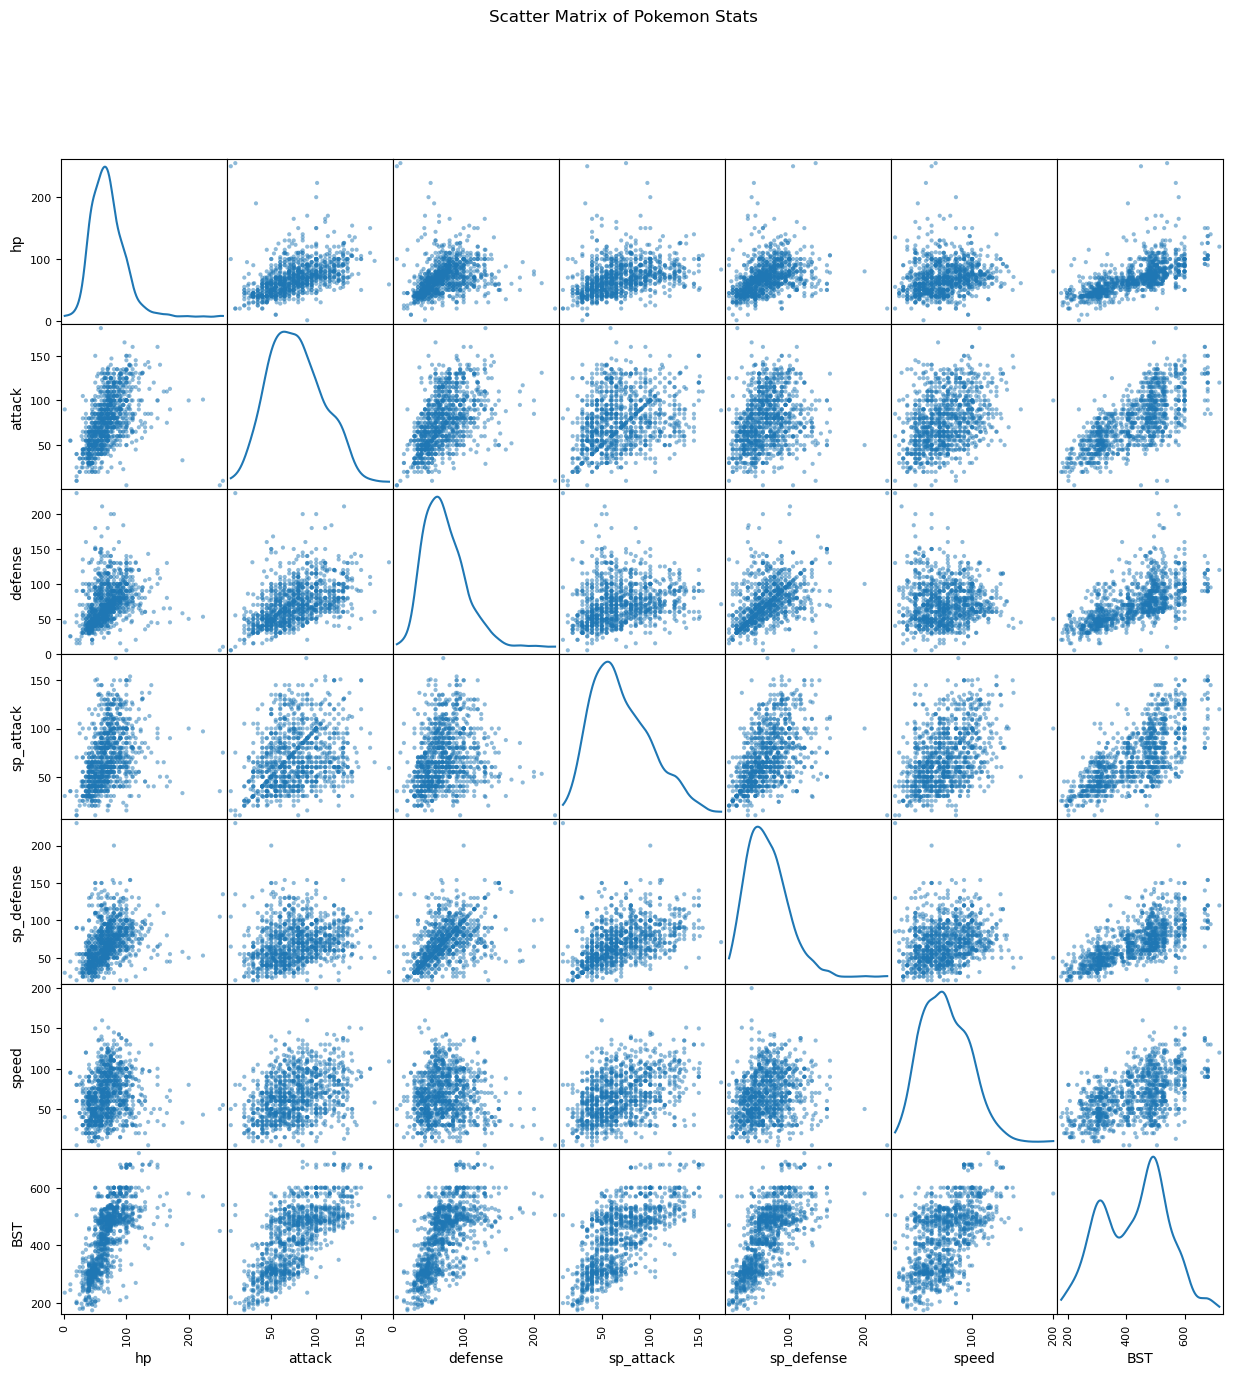

In [19]:
# All Scatterpllots
pd.plotting.scatter_matrix(stat_cols, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix of Pokemon Stats')
plt.show()

### Do certain types have higher stats?

In [20]:
# Do Certain types have higher stats
type_stat_means = poke.groupby(['type_01'])[stat_cols.columns].mean().reset_index()
type_stat_means


,type_01,hp,attack,defense,sp_attack,sp_defense,speed,BST
0,Bug,56.493976,67.192771,69.096386,55.951807,62.831325,61.024096,372.590361
1,Dark,76.022222,88.333333,71.733333,73.155556,70.755556,75.622222,455.622222
2,Dragon,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189,490.162162
3,Electric,64.779661,72.966102,61.762712,84.830508,66.389831,84.728814,435.457627
4,Fairy,71.379310,67.172414,70.965517,75.758621,85.793103,65.000000,436.068966
5,Fighting,76.075000,102.950000,72.350000,53.175000,67.275000,69.975000,441.800000
6,Fire,69.681818,82.606061,66.833333,83.121212,69.545455,74.106061,445.893939
7,Flying,70.000000,79.888889,66.000000,68.444444,68.777778,83.000000,436.111111
8,Ghost,61.371429,68.457143,75.485714,84.114286,80.828571,60.914286,431.171429
9,Grass,65.766990,74.349515,70.699029,73.165049,69.009709,59.543689,412.533981


/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/3742102115.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/3742102115.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/3742102115.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/3742102115.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

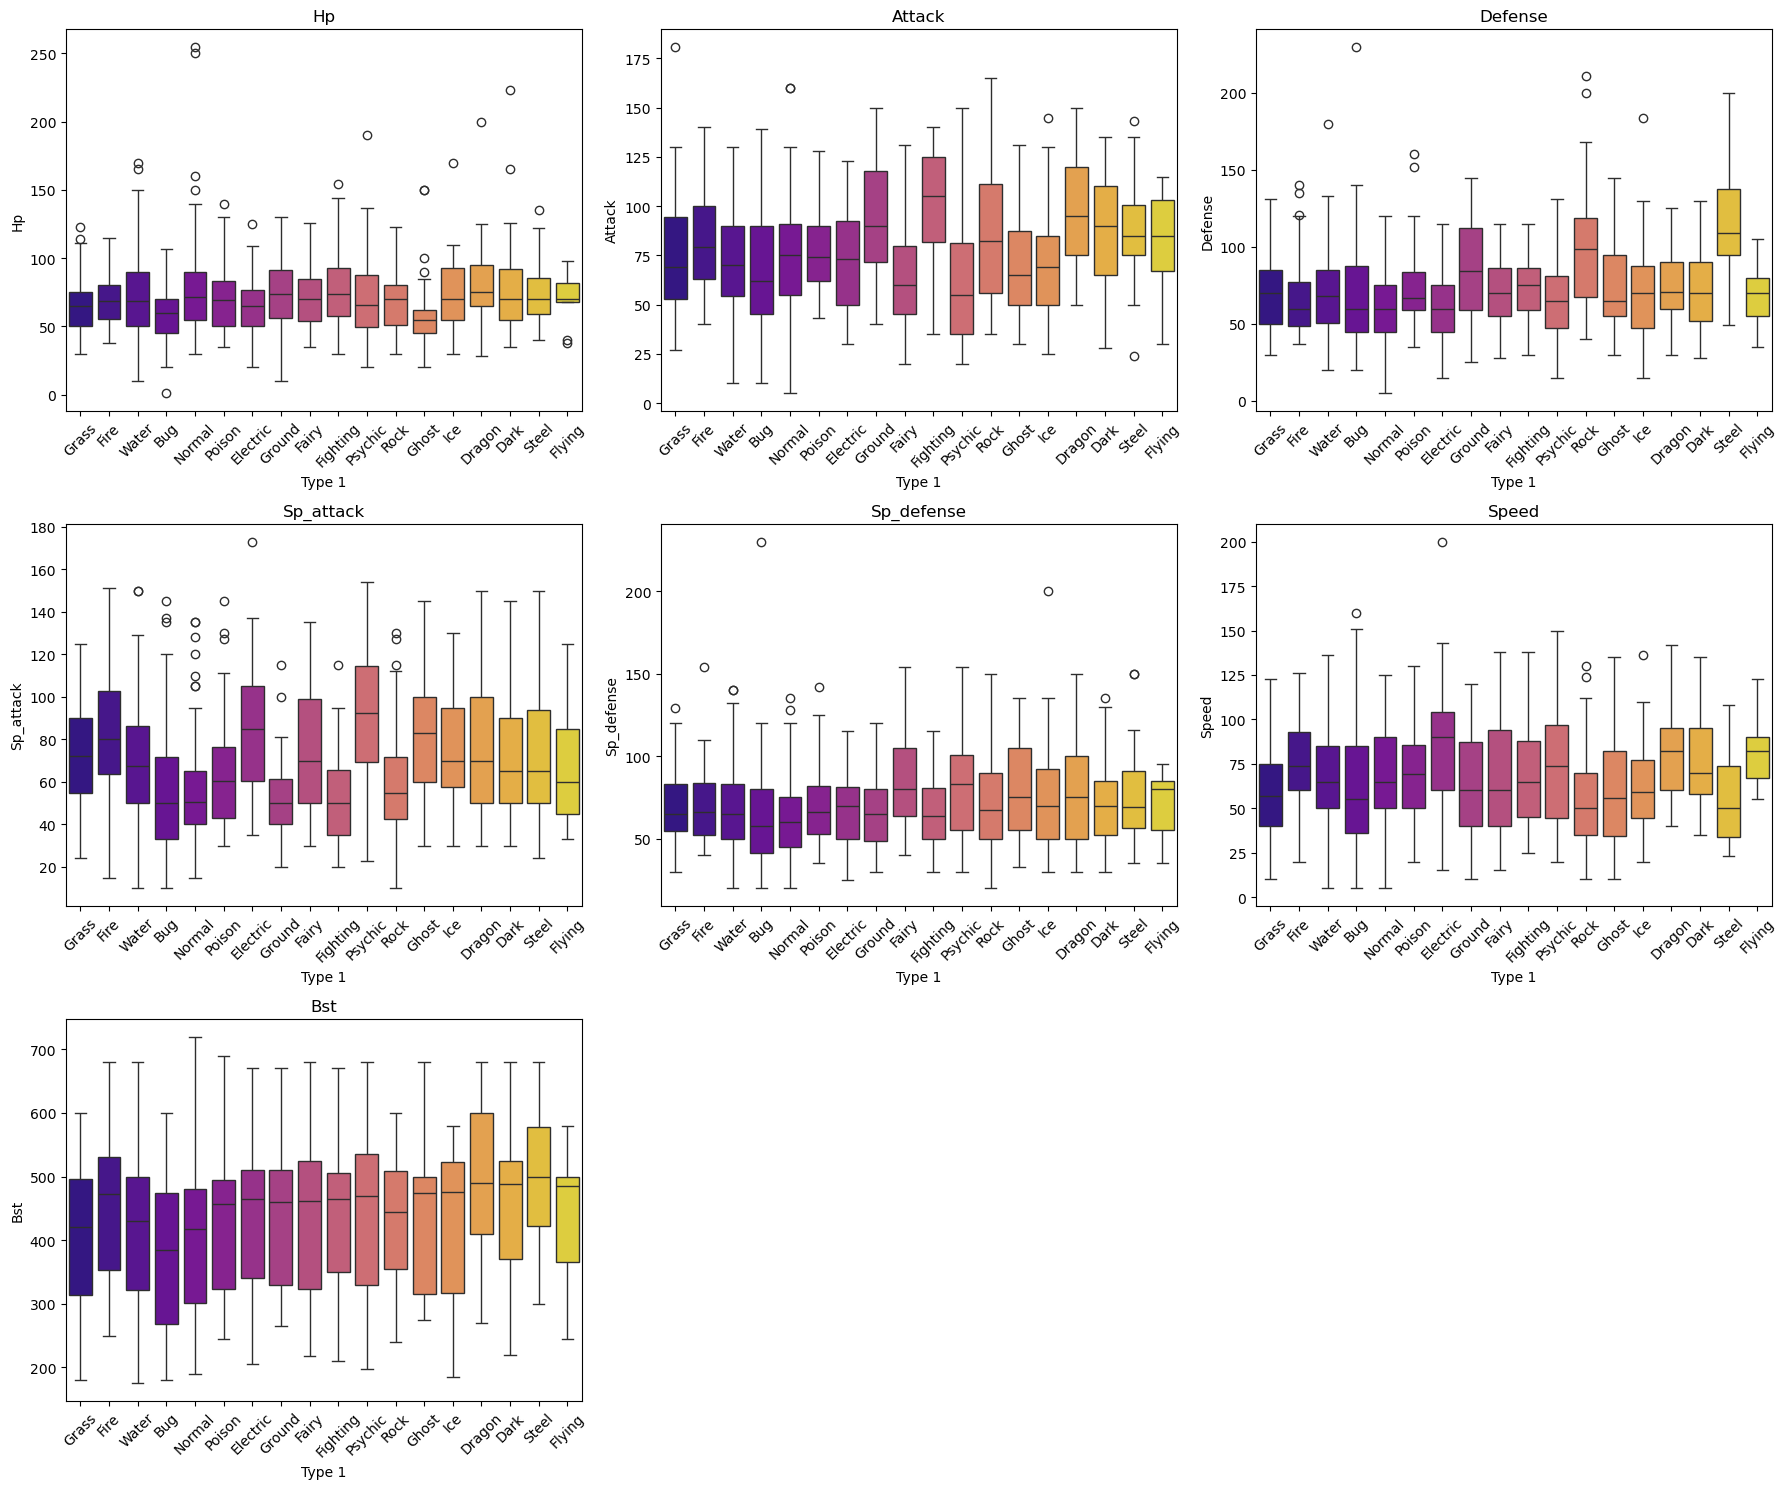

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

stats = stat_cols.columns
n_stats = len(stats)

n_cols = 3                      # columns in grid
n_rows = math.ceil(n_stats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()           # make indexing easy

for i, stat in enumerate(stats):
    sns.boxplot(
        x='type_01',
        y=stat,
        data=poke,
        palette='plasma',
        ax=axes[i]
    )
    axes[i].set_title(stat.capitalize())
    axes[i].set_xlabel('Type 1')
    axes[i].set_ylabel(stat.capitalize())
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
# Kruskal Wallis Test to see if stat differences between types are significant
from scipy.stats import kruskal

stat_results = {}

for stat in stat_cols.columns:
    groups = [group[stat].values for name, group in poke.groupby('type_01')]
    stat_results[stat] = kruskal(*groups)
stat_results

{'hp': KruskalResult(statistic=50.082958953472776, pvalue=4.100566688482516e-05),
 'attack': KruskalResult(statistic=112.71219342221923, pvalue=3.719121099405809e-16),
 'defense': KruskalResult(statistic=116.63678115852356, pvalue=6.723112452796826e-17),
 'sp_attack': KruskalResult(statistic=157.5715079910575, pvalue=7.994085742115331e-25),
 'sp_defense': KruskalResult(statistic=48.05842617974315, pvalue=8.412217351805738e-05),
 'speed': KruskalResult(statistic=74.64410761591989, pvalue=3.3715898789604733e-09),
 'BST': KruskalResult(statistic=55.413797863793626, pvalue=5.879171063620869e-06)}

In [23]:
# Post Hoc Analysis with Dunn's Test
import scikit_posthocs as sp

def tidy_dunn(dunn_df, alpha=0.05):
    """
    Convert Dunn matrix to tidy, significant-only results
    """
    dunn_long = (
        dunn_df
        .where(np.triu(np.ones(dunn_df.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )

    dunn_long.columns = ['group_1', 'group_2', 'p_value']

    return dunn_long[dunn_long['p_value'] < alpha].sort_values('p_value')

significant_dunn_results = {}

for stat in stat_cols.columns:
    dunn = sp.posthoc_dunn(
        poke,
        val_col=stat,
        group_col='type_01',
        p_adjust='bonferroni'
    )
    significant_dunn_results[stat] = tidy_dunn(dunn)

significant_dunn_results



{'hp':    group_1   group_2   p_value
 11     Bug    Normal  0.000111
 1      Bug    Dragon  0.001590
 4      Bug  Fighting  0.015053
 16     Bug     Water  0.023245
 9      Bug    Ground  0.023813,
 'attack':       group_1   group_2       p_value
 83   Fighting   Psychic  8.353278e-09
 4         Bug  Fighting  9.737588e-08
 44     Dragon   Psychic  3.500364e-06
 86   Fighting     Water  9.442523e-06
 1         Bug    Dragon  3.846997e-05
 78   Fighting     Grass  5.264149e-05
 62      Fairy  Fighting  6.468577e-05
 81   Fighting    Normal  7.797215e-05
 128    Ground   Psychic  1.345691e-04
 77   Fighting     Ghost  1.624021e-04
 49   Electric  Fighting  3.311216e-04
 29       Dark   Psychic  8.322169e-04
 9         Bug    Ground  1.370901e-03
 47     Dragon     Water  2.233202e-03
 34     Dragon     Fairy  2.767451e-03
 148   Psychic     Steel  3.935065e-03
 147   Psychic      Rock  5.875484e-03
 38     Dragon     Ghost  7.273019e-03
 39     Dragon     Grass  7.322077e-03
 80   Fight

### Do Stats differ amongst generations?

In [45]:
# Assigning generations based on Name
gen1_names = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
              'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate',
              'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran♀', 'Nidorina',
              'Nidoqueen', 'Nidoran♂', 'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
              'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth',
              'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
              'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout',
              'Weepinbell', 'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash',
              'Slowpoke', 'Slowbro', 'Magnemite', 'Magneton', 'Farfetch\'d', 'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer',
              'Muk', 'Shellder', 'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb',
              'Electrode', 'Exeggcute', 'Exeggutor', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing',
              'Rhyhorn', 'Rhydon', 'Chansey', 'Tangela', 'Kangaskhan', 'Horsea', 'Seadra', 'Goldeen', 'Seaking', 'Staryu', 'Starmie',
              'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir', 'Tauros', 'Magikarp', 'Gyarados', 'Lapras', 'Ditto', 'Eevee', 'Vaporeon',
              'Jolteon', 'Flareon', 'Porygon', 'Omanyte', 'Omastar', 'Kabuto', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres',
              'Dratini', 'Dragonair', 'Dragonite', 'Mewtwo', 'Mew']

gen2_names = ['Chikorita', 'Bayleef', 'Meganium', 'Cyndaquil', 'Quilava', 'Typhlosion', 'Totodile', 'Croconaw', 'Feraligatr', 'Sentret',
              'Furret', 'Hoothoot', 'Noctowl', 'Ledyba', 'Ledian', 'Spinarak', 'Ariados', 'Crobat', 'Chinchou', 'Lanturn', 'Pichu', 'Cleffa', 'Igglybuff',
              'Togepi', 'Togetic', 'Natu', 'Xatu', 'Mareep', 'Flaaffy', 'Ampharos', 'Bellossom', 'Marill', 'Azumarill', 'Sudowoodo',
              'Politoed', 'Hoppip', 'Skiploom', 'Jumpluff', 'Aipom', 'Sunkern', 'Sunflora', 'Yanma', 'Wooper', 'Quagsire', 'Espeon', 'Umbreon', 'Murkrow',
              'Slowking', 'Misdreavus', 'Unown', 'Wobbuffet', 'Girafarig', 'Pineco', 'Forretress', 'Dunsparce', 'Gligar', 'Steelix', 'Snubbull',
              'Granbull', 'Qwilfish', 'Scizor', 'Shuckle', 'Heracross', 'Sneasel', 'Teddiursa', 'Ursaring', 'Slugma', 'Magcargo', 'Swinub', 'Piloswine', 'Corsola',
              'Remoraid', 'Octillery', 'Delibird', 'Mantine', 'Skarmory', 'Houndour', 'Houndoom', 'Kingdra', 'Phanpy', 'Donphan', 'Porygon2', 'Stantler',
              'Smeargle', 'Tyrogue', 'Hitmontop', 'Smoochum', 'Elekid', 'Magby', 'Miltank', 'Blissey', 'Raikou', 'Entei', 'Suicune', 'Larvitar',
              'Pupitar', 'Tyranitar', 'Lugia', 'Ho-Oh', 'Celebi']


gen3_names = ['Treecko', 'Grovyle', 'Sceptile', 'Torchic', 'Combusken', 'Blaziken', 'Mudkip', 'Marshtomp', 'Swampert', 'Poochyena', 'Mightyena', 'Zigzagoon', 'Linoone', 'Wurmple', 'Silcoon', 'Beautifly', 'Cascoon', 'Dustox', 'Lotad', 'Lombre', 'Ludicolo', 
'Seedot', 'Nuzleaf', 'Shiftry', 'Taillow', 'Swellow', 'Wingull', 'Pelipper', 'Ralts', 'Kirlia', 'Gardevoir', 'Surskit', 'Masquerain', 'Shroomish', 'Breloom', 'Slakoth', 'Vigoroth', 'Slaking', 'Nincada', 'Ninjask', 'Shedinja', 'Whismur', 'Loudred', 'Exploud', 'Makuhita', 'Hariyama', 'Azurill', 'Nosepass', 'Skitty', 'Delcatty', 'Sableye', 'Mawile', 'Aron', 
'Lairon', 'Aggron', 'Meditite', 'Medicham', 'Electrike', 'Manectric', 'Plusle', 'Minun', 'Volbeat', 'Illumise', 'Roselia', 'Gulpin', 'Swalot', 'Carvanha', 'Sharpedo', 'Wailmer', 'Wailord', 'Numel', 'Camerupt', 'Torkoal', 'Spoink', 'Grumpig', 'Spinda', 'Trapinch', 'Vibrava', 'Flygon', 'Cacnea', 'Cacturne', 'Swablu', 'Altaria', 'Zangoose', 'Seviper', 'Lunatone',
'Solrock', 'Barboach', 'Whiscash', 'Corphish', 'Crawdaunt', 'Baltoy', 'Claydol', 'Lileep', 'Cradily', 'Anorith', 'Armaldo', 'Feebas', 'Milotic', 'Castform', 'Kecleon', 'Shuppet', 'Banette', 'Duskull', 'Dusclops', 'Tropius', 'Chimecho', 'Absol', 'Wynaut', 'Snorunt', 'Glalie', 'Spheal', 'Sealeo', 'Walrein', 'Clamperl', 'Huntail', 'Gorebyss', 'Relicanth', 'Luvdisc',
'Bagon', 'Shelgon', 'Salamence', 'Beldum', 'Metang', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys']

gen4_names = ['Turtwig', 'Grotle', 'Torterra', 'Chimchar', 'Monferno', 'Infernape', 'Piplup', 'Prinplup', 'Empoleon', 'Starly', 'Staravia', 
              'Staraptor', 'Bidoof', 'Bibarel', 'Kricketot', 'Kricketune', 'Shinx', 'Luxio', 'Luxray', 'Budew', 'Roserade', 'Cranidos',
              'Rampardos', 'Shieldon', 'Bastiodon', 'Burmy', 'Wormadam', 'Mothim', 'Combee', 'Vespiquen', 'Pachirisu', 'Buizel', 'Floatzel',
              'Cherubi', 'Cherrim', 'Shellos', 'Gastrodon', 'Ambipom', 'Drifloon', 'Drifblim', 'Buneary', 'Lopunny', 'Mismagius', 'Honchkrow', 
              'Glameow', 'Purugly', 'Chingling', 'Stunky', 'Skuntank', 'Bronzor', 'Bronzong', 'Bonsly', 'Mime Jr.', 'Happiny', 'Chatot', 'Spiritomb', 
              'Gible', 'Gabite', 'Garchomp', 'Munchlax', 'Riolu', 'Lucario', 'Hippopotas', 'Hippowdon', 'Skorupi', 'Drapion', 'Croagunk', 'Toxicroak', 
              'Carnivine', 'Finneon', 'Lumineon', 'Mantyke', 'Snover', 'Abomasnow', 'Weavile', 'Magnezone', 'Lickilicky', 'Rhyperior', 'Tangrowth', 'Electivire', 
              'Magmortar', 'Togekiss', 'Yanmega', 'Leafeon', 'Glaceon', 'Gliscor', 'Mamoswine', 'Porygon-Z', 'Gallade', 'Probopass', 'Dusknoir', 'Froslass', 'Rotom', 
              'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Cresselia', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus']

gen5_names = ['Victini', 'Snivy', 'Servine', 'Serperior', 'Tepig', 'Pignite', 'Emboar', 'Oshawott', 'Dewott', 'Samurott', 'Patrat', 'Watchog', 'Lillipup', 'Herdier', 
              'Stoutland', 'Purrloin', 'Liepard', 'Pansage', 'Simisage', 'Pansear', 'Simisear', 'Panpour', 'Simipour', 'Munna', 'Musharna', 'Pidove', 'Tranquill', 'Unfezant', 
              'Blitzle', 'Zebstrika', 'Roggenrola', 'Boldore', 'Gigalith', 'Woobat', 'Swoobat', 'Drilbur', 'Excadrill', 'Audino', 'Timburr', 'Gurdurr', 'Conkeldurr', 'Tympole', 
              'Palpitoad', 'Seismitoad', 'Throh', 'Sawk', 'Sewaddle', 'Swadloon', 'Leavanny', 'Venipede', 'Whirlipede', 'Scolipede', 'Cottonee', 'Whimsicott', 'Petilil', 'Lilligant', 
              'Basculin', 'Sandile', 'Krokorok', 'Krookodile', 'Darumaka', 'Darmanitan', 'Maractus', 'Dwebble', 'Crustle', 'Scraggy', 'Scrafty', 'Sigilyph', 'Yamask', 'Cofagrigus', 
              'Tirtouga', 'Carracosta', 'Archen', 'Archeops', 'Trubbish', 'Garbodor', 'Zorua', 'Zoroark', 'Minccino', 'Cinccino', 'Gothita', 'Gothorita', 'Gothitelle', 'Solosis', 'Duosion', 
              'Reuniclus', 'Ducklett', 'Swanna', 'Vanillite', 'Vanillish', 'Vanilluxe', 'Deerling', 'Sawsbuck', 'Emolga', 'Karrablast', 'Escavalier', 'Foongus', 'Amoonguss', 'Frillish', 'Jellicent', 
              'Alomomola', 'Joltik', 'Galvantula', 'Ferroseed', 'Ferrothorn', 'Klink', 'Klang', 'Klinklang', 'Tynamo', 'Eelektrik', 'Eelektross', 'Elgyem', 'Beheeyem', 'Litwick', 'Lampent', 'Chandelure', 
              'Axew', 'Fraxure', 'Haxorus', 'Cubchoo', 'Beartic', 'Cryogonal', 'Shelmet', 'Accelgor', 'Stunfisk', 'Mienfoo', 'Mienshao', 'Druddigon', 'Golett', 'Golurk', 'Pawniard', 'Bisharp', 'Bouffalant', 
              'Rufflet', 'Braviary', 'Vullaby', 'Mandibuzz', 'Heatmor', 'Durant', 'Deino', 'Zweilous', 'Hydreigon', 'Larvesta', 'Volcarona', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 
              'Reshiram', 'Zekrom', 'Landorus', 'Kyurem', 'Keldeo', 'Meloetta', 'Genesect']

gen6_names = ['Chespin', 'Quilladin', 'Chesnaught', 'Fennekin', 'Braixen', 'Delphox', 'Froakie', 'Frogadier', 'Greninja', 'Bunnelby', 'Diggersby', 'Fletchling', 'Fletchinder', 'Talonflame', 
              'Scatterbug', 'Spewpa', 'Vivillon', 'Litleo', 'Pyroar', 'Flabébé', 'Floette', 'Florges', 'Skiddo', 'Gogoat', 'Pancham', 'Pangoro', 'Furfrou', 'Espurr', 'Meowstic', 'Honedge', 
              'Doublade', 'Aegislash', 'Spritzee', 'Aromatisse', 'Swirlix', 'Slurpuff', 'Inkay', 'Malamar', 'Binacle', 'Barbaracle', 'Skrelp', 'Dragalge', 'Clauncher', 'Clawitzer', 'Helioptile', 
              'Heliolisk', 'Tyrunt', 'Tyrantrum', 'Amaura', 'Aurorus', 'Sylveon', 'Hawlucha', 'Dedenne', 'Carbink', 'Goomy', 'Sliggoo', 'Goodra', 'Klefki', 'Phantump', 'Trevenant', 'Pumpkaboo', 'Gourgeist', 
              'Bergmite', 'Avalugg', 'Noibat', 'Noivern', 'Xerneas', 'Yveltal', 'Zygarde', 'Diancie', 'Hoopa', 'Volcanion']

gen7_names = ['Rowlet', 'Dartrix', 'Decidueye', 'Litten', 'Torracat', 'Incineroar', 'Popplio', 'Brionne', 'Primarina', 'Pikipek', 'Trumbeak', 'Toucannon', 'Yungoos', 'Gumshoos', 'Grubbin', 'Charjabug', 'Vikavolt', 
              'Crabrawler', 'Crabominable', 'Oricorio', 'Cutiefly', 'Ribombee', 'Rockruff', 'Lycanroc', 'Wishiwashi', 'Mareanie', 'Toxapex', 'Mudbray', 'Mudsdale', 'Dewpider', 'Araquanid', 'Fomantis', 'Lurantis', 'Morelull', 
              'Shiinotic', 'Salandit', 'Salazzle', 'Stufful', 'Bewear', 'Bounsweet', 'Steenee', 'Tsareena', 'Comfey', 'Oranguru', 'Passimian', 'Wimpod', 'Golisopod', 'Sandygast', 'Palossand', 'Pyukumuku', 'Type: Null', 'Silvally', 
              'Minior', 'Komala', 'Turtonator', 'Togedemaru', 'Mimikyu', 'Bruxish', 'Drampa', 'Dhelmise', 'Jangmo-o', 'Hakamo-o', 'Kommo-o', 'Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 
              'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree', 'Celesteela', 'Kartana', 'Guzzlord', 'Necrozma', 'Magearna', 'Marshadow', 'Poipole', 'Naganadel', 'Stakataka', 'Blacephalon', 'Zeraora', 'Meltan', 'Melmetal']

gen8_names = ['Grookey', 'Thwackey', 'Rillaboom', 'Scorbunny', 'Raboot', 'Cinderace', 'Sobble', 'Drizzile', 'Inteleon', 'Skwovet', 'Greedent', 'Rookidee', 'Corvisquire', 'Corviknight', 'Blipbug', 'Dottler', 'Orbeetle', 'Nickit', 
              'Thievul', 'Gossifleur', 'Eldegoss', 'Wooloo', 'Dubwool', 'Chewtle', 'Drednaw', 'Yamper', 'Boltund', 'Rolycoly', 'Carkol', 'Coalossal', 'Applin', 'Flapple', 'Appletun', 'Silicobra', 'Sandaconda', 'Cramorant', 'Arrokuda', 
              'Barraskewda', 'Toxel', 'Toxtricity', 'Sizzlipede', 'Centiskorch', 'Clobbopus', 'Grapploct', 'Sinistea', 'Polteageist', 'Hatenna', 'Hattrem', 'Hatterene', 'Impidimp', 'Morgrem', 'Grimmsnarl', 'Obstagoon', 'Perrserker', 
              'Cursola', 'Sirfetch\'d', 'Mr. Rime', 'Runerigus', 'Milcery', 'Alcremie', 'Falinks', 'Pincurchin', 'Snom', 'Frosmoth', 'Stonjourner', 'Eiscue', 'Indeedee', 'Morpeko', 'Cufant', 'Copperajah', 'Dracozolt', 'Arctozolt', 
              'Dracovish', 'Arctovish', 'Duraludon', 'Dreepy', 'Drakloak', 'Dragapult', 'Zacian', 'Zamazenta', 'Eternatus', 'Kubfu', 'Urshifu', 'Zarude', 'Regieleki', 'Regidrago', 'Glastrier', 'Spectrier', 'Calyrex', 'Wyrdeer', 
              'Kleavor', 'Ursaluna', 'Basculegion', 'Sneasler', 'Overqwil', 'Enamorus', 'Sprigatito', 'Floragato', 'Meowscarada', 'Fuecoco', 'Crocalor', 'Skeledirge', 'Quaxly', 'Quaxwell', 'Quaquaval', 'Lechonk', 'Oinkologne', 
              'Tarountula', 'Spidops', 'Nymble', 'Lokix', 'Pawmi', 'Pawmo', 'Pawmot', 'Tandemaus', 'Maushold', 'Fidough', 'Dachsbun', 'Smoliv', 'Dolliv', 'Arboliva', 'Squawkabilly', 'Nacli', 'Naclstack', 'Garganacl', 'Charcadet', 
              'Armarouge', 'Ceruledge', 'Tadbulb', 'Bellibolt', 'Wattrel', 'Kilowattrel', 'Maschiff', 'Mabosstiff', 'Shroodle', 'Grafaiai', 'Bramblin', 'Brambleghast', 'Toedscool', 'Toedscruel', 'Klawf', 'Capsakid', 'Scovillain', 
              'Rellor', 'Rabsca', 'Flittle', 'Espathra', 'Tinkatink', 'Tinkatuff', 'Tinkaton', 'Wiglett', 'Wugtrio', 'Bombirdier', 'Finizen', 'Palafin', 'Varoom', 'Revavroom', 'Cyclizar', 'Orthworm', 'Glimmet', 'Glimmora', 'Greavard', 
              'Houndstone', 'Flamigo', 'Cetoddle', 'Cetitan', 'Veluza', 'Dondozo', 'Tatsugiri', 'Annihilape', 'Clodsire', 'Farigiraf', 'Dudunsparce', 'Kingambit', 'Great Tusk', 'Scream Tail', 'Brute Bonnet', 'Flutter Mane', 'Slither Wing', 'Sandy Shocks', 
              'Iron Treads', 'Iron Bundle', 'Iron Hands', 'Iron Jugulis', 'Iron Moth', 'Iron Thorns', 'Frigibax', 'Arctibax', 'Baxcalibur', 'Gimmighoul', 'Gholdengo', 'Wo-Chien', 'Chien-Pao', 'Ting-Lu', 'Chi-Yu', 'Roaring Moon', 'Iron Valiant',
              'Koraidon', 'Miraidon', 'Walking Wake', 'Iron Leaves', 'Dipplin', 'Poltchageist', 'Sinistcha', 'Okidogi', 'Munkidori', 'Fezandipiti', 'Ogerpon', 'Archaludon', 'Hydrapple', 'Gouging Fire', 'Raging Bolt', 'Iron Boulder', 'Iron Crown', 'Terapagos', 
              'Pecharunt']    





def assign_generation(name):
    if name in gen1_names:
        return 'Gen 1'
    elif name in gen2_names:
        return 'Gen 2'
    elif name in gen3_names:    
        return 'Gen 3'
    elif name in gen4_names:
        return 'Gen 4'
    elif name in gen5_names:
        return 'Gen 5'
    elif name in gen6_names:
        return 'Gen 6'
    elif name in gen7_names:
        return 'Gen 7'
    elif name in gen8_names:
        return 'Gen 8'
    else:
        return 'Unknown'
    
poke['generation'] = poke['name'].apply(assign_generation)

poke['generation'].value_counts()
    

generation
Gen 8    216
Gen 5    156
Gen 1    151
Gen 3    135
Gen 4    107
Gen 2    100
Gen 7     88
Gen 6     72
Name: count, dtype: int64

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2413623957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2413623957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2413623957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_1250/2413623957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

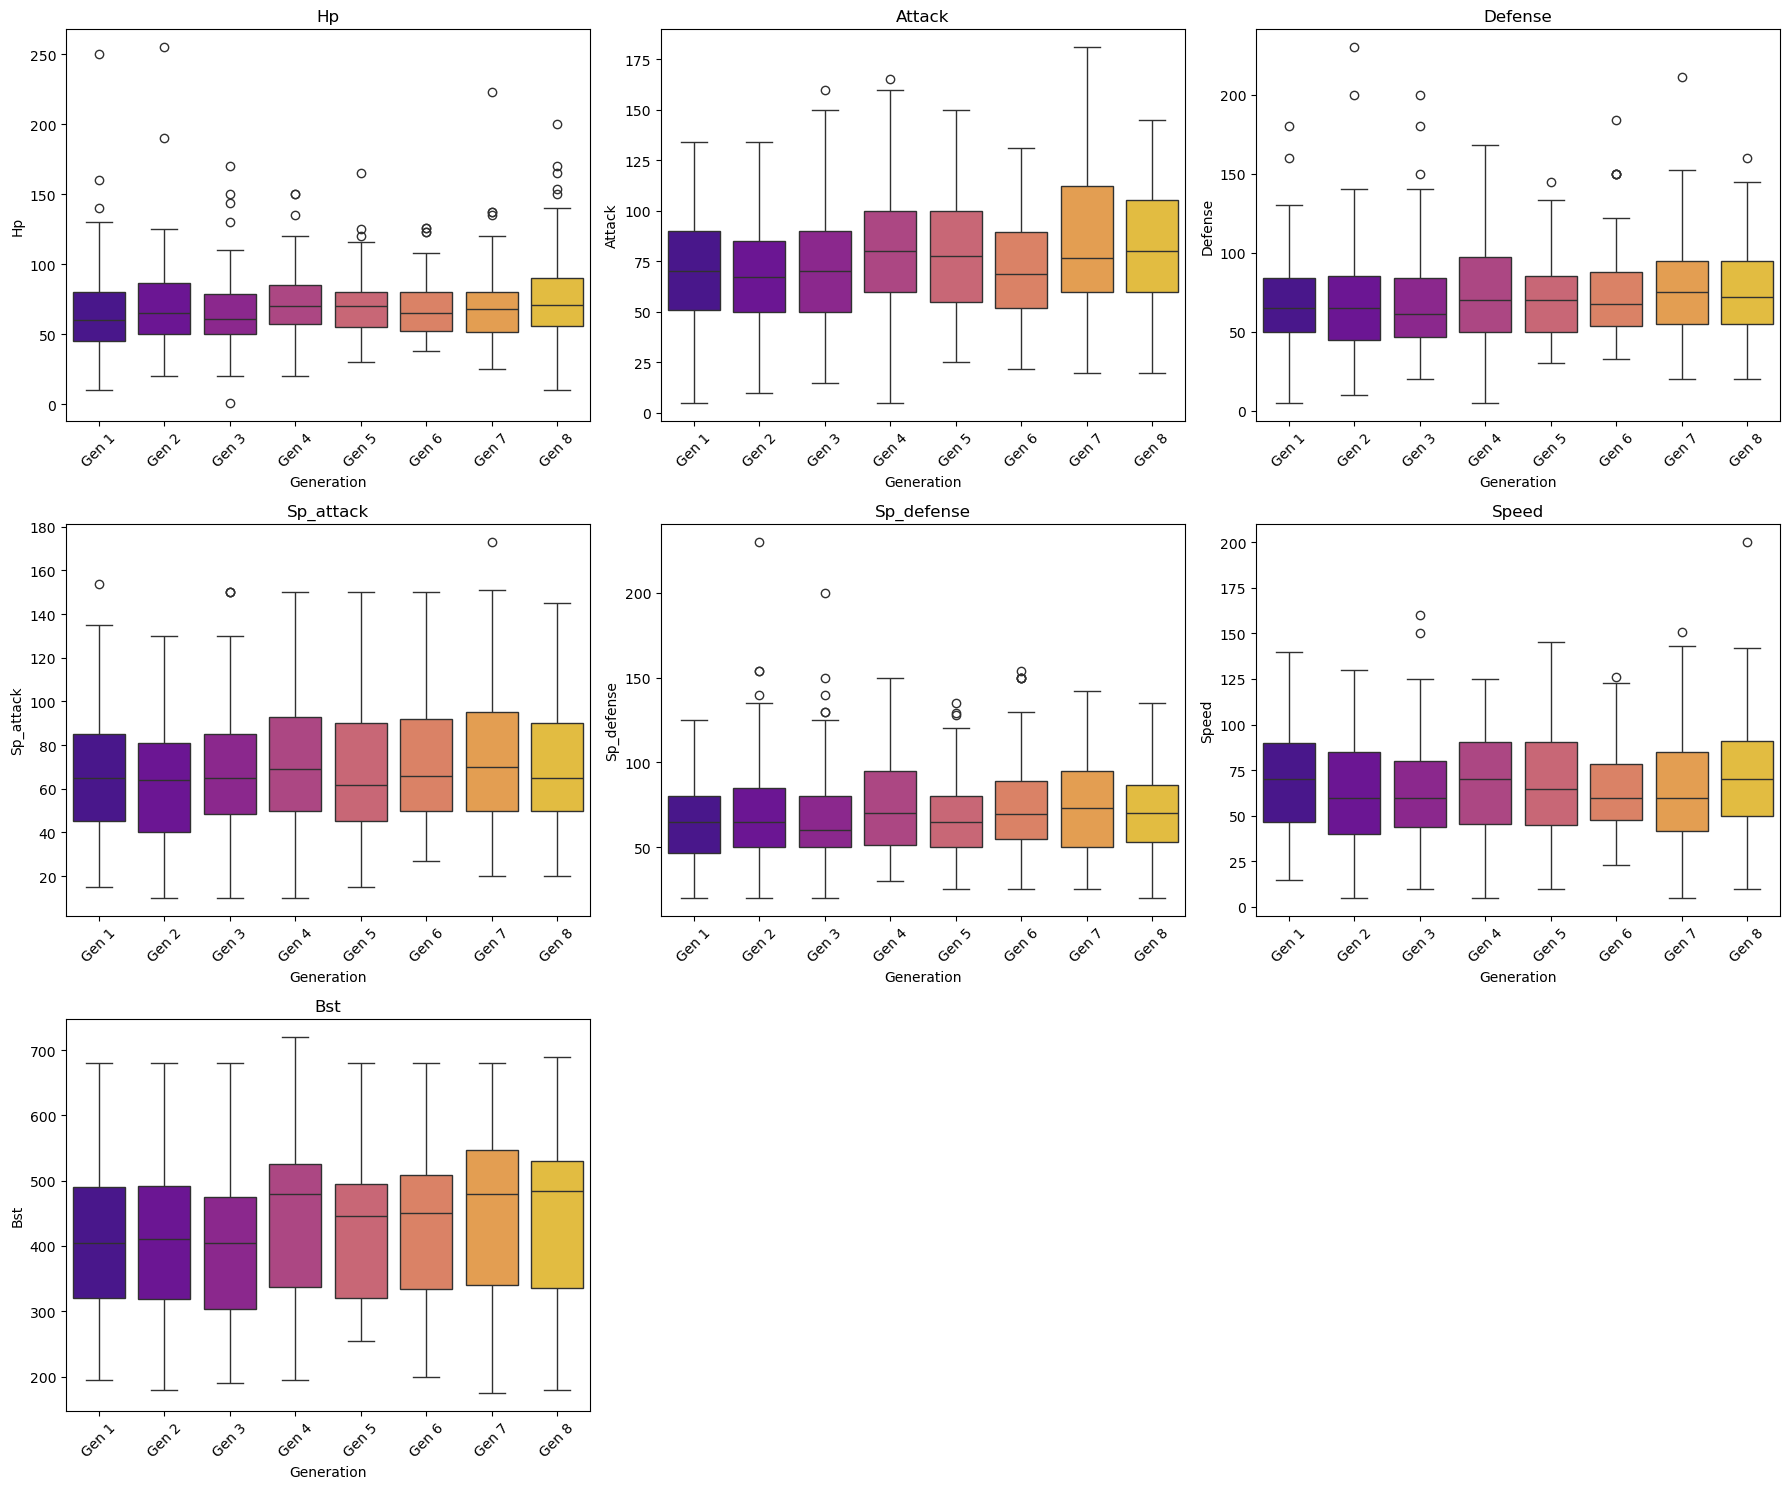

In [46]:
# Box plots of stats by generation

import matplotlib.pyplot as plt
import seaborn as sns
import math

stats = stat_cols.columns
n_stats = len(stats)

n_cols = 3                      # columns in grid
n_rows = math.ceil(n_stats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()           # make indexing easy

for i, stat in enumerate(stats):
    sns.boxplot(
        x='generation',
        y=stat,
        data=poke,
        palette='plasma',
        ax=axes[i]
    )
    axes[i].set_title(stat.capitalize())
    axes[i].set_xlabel('Generation')
    axes[i].set_ylabel(stat.capitalize())
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [48]:

# Kruskal Wallis Test to see if stat differences between types are significant
from scipy.stats import kruskal

stat_results = {}

for stat in stat_cols.columns:
        groups = [group[stat].values for name, group in poke.groupby('generation')]
        stat_results[stat] = kruskal(*groups)
stat_results

{'hp': KruskalResult(statistic=28.484251012883362, pvalue=0.00017960794801477926),
 'attack': KruskalResult(statistic=30.398464887572956, pvalue=8.023623579534933e-05),
 'defense': KruskalResult(statistic=16.953146881022413, pvalue=0.01770081134098012),
 'sp_attack': KruskalResult(statistic=8.643478703389832, pvalue=0.2792760103712941),
 'sp_defense': KruskalResult(statistic=14.775364970730267, pvalue=0.03898915729736156),
 'speed': KruskalResult(statistic=17.728403807678617, pvalue=0.013257368085571217),
 'BST': KruskalResult(statistic=36.7467308690361, pvalue=5.238242015439458e-06)}

In [50]:
# Dunn's Test for Post Hoc Analysis

import scikit_posthocs as sp

def tidy_dunn(dunn_df, alpha=0.05):
    """
    Convert Dunn matrix to tidy, significant-only results
    """
    dunn_long = (
        dunn_df
        .where(np.triu(np.ones(dunn_df.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )

    dunn_long.columns = ['group_1', 'group_2', 'p_value']

    return dunn_long[dunn_long['p_value'] < alpha].sort_values('p_value')

significant_dunn_results = {}

for stat in stat_cols.columns:
    dunn = sp.posthoc_dunn(
        poke,
        val_col=stat,
        group_col='generation',
        p_adjust='bonferroni'
    )
    significant_dunn_results[stat] = tidy_dunn(dunn)

significant_dunn_results



{'hp':    group_1 group_2   p_value
 6    Gen 1   Gen 8  0.000137
 17   Gen 3   Gen 8  0.006887
 2    Gen 1   Gen 4  0.025937,
 'attack':    group_1 group_2   p_value
 12   Gen 2   Gen 8  0.004686
 11   Gen 2   Gen 7  0.021335,
 'defense': Empty DataFrame
 Columns: [group_1, group_2, p_value]
 Index: [],
 'sp_attack': Empty DataFrame
 Columns: [group_1, group_2, p_value]
 Index: [],
 'sp_defense': Empty DataFrame
 Columns: [group_1, group_2, p_value]
 Index: [],
 'speed':    group_1 group_2   p_value
 17   Gen 3   Gen 8  0.020004,
 'BST':    group_1 group_2   p_value
 17   Gen 3   Gen 8  0.000265
 6    Gen 1   Gen 8  0.002165
 12   Gen 2   Gen 8  0.014840
 16   Gen 3   Gen 7  0.019621
 13   Gen 3   Gen 4  0.022845}

### Can we Predict Type Based on Stats

#### Decesion Tree

In [24]:
# Decision Tree to predict Type 1 based on stats
X_vars = stat_cols
y_var = poke['type_01']

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_vars, y_var, test_size=0.2, random_state=42)

#Hyperparameter Tuning with Grid Search 
classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'class_weight': [None, 'balanced'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1,
                           scoring='accuracy')



In [25]:
#Fitting the Model
grid_search.fit(X_train, y_train)

#Finding Best params and model
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#Evaluating Training Results
y_train_pred = best_tree.predict(X_train)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))


Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Classification Report:
              precision    recall  f1-score   support

         Bug       0.59      0.30      0.40        66
        Dark       0.33      0.06      0.10        35
      Dragon       0.31      0.48      0.38        31
    Electric       0.46      0.12      0.20        48
       Fairy       0.00      0.00      0.00        23
    Fighting       0.75      0.19      0.31        31
        Fire       0.00      0.00      0.00        57
      Flying       0.00      0.00      0.00         8
       Ghost       0.40      0.08      0.13        26
       Grass       0.21      0.11      0.15        81
      Ground       0.54      0.25      0.34        28
         Ice       0.29      0.07      0.12        27
      Normal       0.27      0.70      0.39        98
      Poison       0.00      0.00      0.00        32
     Psychic       0.29  

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [26]:
#Evaluating Test Results
y_test_pred = best_tree.predict(X_test)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

         Bug       0.29      0.12      0.17        17
        Dark       0.00      0.00      0.00        10
      Dragon       0.12      0.33      0.18         6
    Electric       0.00      0.00      0.00        11
       Fairy       0.00      0.00      0.00         6
    Fighting       0.00      0.00      0.00         9
        Fire       0.00      0.00      0.00         9
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         9
       Grass       0.21      0.14      0.17        22
      Ground       0.00      0.00      0.00        12
         Ice       0.00      0.00      0.00         4
      Normal       0.15      0.45      0.23        20
      Poison       0.00      0.00      0.00        12
     Psychic       0.38      0.23      0.29        13
        Rock       0.31      0.40      0.35        10
       Steel       0.00      0.00      0.00         7

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

#### XGBoost

In [27]:
# XGBoost to predict Type 1 based on stats

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_var)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    X_vars,             # your features
    y_encoded,
    test_size=0.3,      # 30% goes to val+test
    stratify=y_encoded,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.67,     # ~20% of total for test
    stratify=y_temp,
    random_state=42
)


# Hyperparameter Tuning with Grid Search for XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    num_class=len(le.classes_),
    random_state=42
)

#Run Grid Search to find best hyperparameters
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid={
        'max_depth': [1, 2, 3], #How deep the tree can go; kep it shallow to avoid overfitting
        'min_child_weight': [1, 3, 5], # prevents overfitting by ensuring each leaf has enough samples
        'subsample': [0.7, 0.8], #controls what fraction of the training rows are used to build each tree
        'colsample_bytree': [0.7, 0.8, 1.0], #what fraction of features (columns) are randomly selected for each tree
        'gamma': [0.8, 1, 1.5], #minimum loss reduction required to make a further partition on a leaf node of the tree
        'reg_lambda': [2], #L2 regularization term on weights (ridge regression)
        'reg_alpha': [0.5] #L1 regularization term on weights (lasso regression)
    },
    cv=5,
    n_jobs=-1,
    scoring='f1_macro'
)

xgb_grid.fit(X_train, y_train)

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_class=18, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0.8, 1, 1.5], 'max_depth': [1, 2, 3],
                         'min_child_weight': [1, 3, 5], 'reg_alpha': [0.5],
                         'reg_lambda': [2], 'subsample': [0.7, 0.8]},
             scoring='f1_macro')

In [28]:
# Create a final model with best parameters that utilizes early stopping, hopefully to prevent overfitting

print("Best parameters found:")
best_params_xgb = xgb_grid.best_params_
print(best_params_xgb)

final_xgb_model = xgb.XGBClassifier(
    **best_params_xgb,
    objective='multi:softprob',
    eval_metric='mlogloss',
    n_estimators=500,
    learning_rate=0.03,
    use_label_encoder=False,
    num_class=len(le.classes_),
    random_state=42
)

final_xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=30,   
    verbose=False
)

Best parameters found:
{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 5, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}


/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_class=18, num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
#Evaluating Training Results
y_train_pred = final_xgb_model.predict(X_train)
y_val_pred = final_xgb_model.predict(X_val)
y_test_pred = final_xgb_model.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


Train Classification Report:
              precision    recall  f1-score   support

         Bug       0.38      0.29      0.33        58
        Dark       1.00      0.10      0.18        31
      Dragon       0.39      0.35      0.37        26
    Electric       0.37      0.39      0.38        41
       Fairy       0.00      0.00      0.00        20
    Fighting       0.45      0.36      0.40        28
        Fire       0.53      0.41      0.46        46
      Flying       0.00      0.00      0.00         6
       Ghost       0.62      0.33      0.43        24
       Grass       0.31      0.42      0.35        72
      Ground       0.62      0.29      0.39        28
         Ice       0.00      0.00      0.00        22
      Normal       0.40      0.75      0.52        83
      Poison       0.33      0.03      0.06        31
     Psychic       0.44      0.43      0.43        42
        Rock       0.46      0.44      0.45        41
       Steel       0.50      0.50      0.50        2

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [30]:
#Evaluating test Results
y_test_pred = final_xgb_model.predict(X_test)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

Test Classification Report:
              precision    recall  f1-score   support

         Bug       0.33      0.18      0.23        17
        Dark       0.00      0.00      0.00         9
      Dragon       0.17      0.14      0.15         7
    Electric       0.20      0.08      0.12        12
       Fairy       0.00      0.00      0.00         6
    Fighting       0.25      0.25      0.25         8
        Fire       0.17      0.14      0.15        14
      Flying       0.00      0.00      0.00         2
       Ghost       0.00      0.00      0.00         7
       Grass       0.16      0.24      0.19        21
      Ground       0.00      0.00      0.00         8
         Ice       0.00      0.00      0.00         6
      Normal       0.37      0.67      0.48        24
      Poison       0.00      0.00      0.00         9
     Psychic       0.18      0.25      0.21        12
        Rock       0.00      0.00      0.00        11
       Steel       0.12      0.14      0.13         7

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

### Using Kneighbors to see if classification can be better

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vars, y_var, test_size=0.2, random_state=42, stratify=y_var
)

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        weights = 'distance',
        metric = 'minkowski',
        p=2))
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [36]:
#Evaluate on Test
y_knn_test_pred = knn_pipeline.predict(X_test)

print("Test Classification Report:")
print(classification_report(y_test, y_knn_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

         Bug       0.27      0.38      0.32        16
        Dark       0.17      0.11      0.13         9
      Dragon       0.00      0.00      0.00         7
    Electric       0.00      0.00      0.00        12
       Fairy       0.00      0.00      0.00         6
    Fighting       0.30      0.38      0.33         8
        Fire       0.17      0.23      0.19        13
      Flying       0.00      0.00      0.00         2
       Ghost       0.00      0.00      0.00         7
       Grass       0.14      0.20      0.17        20
      Ground       0.10      0.12      0.11         8
         Ice       0.00      0.00      0.00         6
      Normal       0.38      0.42      0.40        24
      Poison       0.00      0.00      0.00         9
     Psychic       0.00      0.00      0.00        12
        Rock       0.00      0.00      0.00        12
       Steel       0.12      0.14      0.13         7

In [39]:
# Tune Parameters

param_grid_knn = {
    'knn__n_neighbors': [3,5,7,9,11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
    'knn__p': [1,2]
}

grid_search_knn = GridSearchCV(
    knn_pipeline,
    param_grid_knn,
    cv=5,
    scoring = 'accuracy',
    n_jobs=-1 
)


grid_search_knn.fit(X_train, y_train)

best_knn_params = grid_search_knn.best_params_
print("Best KNN Hyperparameters:", best_knn_params)

Best KNN Hyperparameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}


In [40]:
y_knn_test_pred = grid_search_knn.predict(X_test)

print("Test Classification Report:")
print(classification_report(y_test, y_knn_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

         Bug       0.22      0.31      0.26        16
        Dark       0.00      0.00      0.00         9
      Dragon       0.00      0.00      0.00         7
    Electric       0.00      0.00      0.00        12
       Fairy       0.00      0.00      0.00         6
    Fighting       0.25      0.25      0.25         8
        Fire       0.21      0.31      0.25        13
      Flying       0.00      0.00      0.00         2
       Ghost       0.00      0.00      0.00         7
       Grass       0.18      0.25      0.21        20
      Ground       0.00      0.00      0.00         8
         Ice       0.00      0.00      0.00         6
      Normal       0.33      0.46      0.39        24
      Poison       0.00      0.00      0.00         9
     Psychic       0.00      0.00      0.00        12
        Rock       0.00      0.00      0.00        12
       Steel       0.33      0.29      0.31         7

/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/workingEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

### Clustering Pokemon into different categories (Tanks, support, etc.)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

stat_cols2 = poke[['hp','attack','defense','sp_attack','sp_defense','speed']]

#Make the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

#Fit the pipeline
pipeline.fit(stat_cols2)

#Get Cluster Labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

#Add clusters to full df
poke['cluster'] = cluster_labels

#decide what each cluster is
cluster_summary = poke.groupby('cluster')[['hp','attack','defense','sp_attack','sp_defense','speed']].mean()
print("Cluster summary (average stats):")
cluster_summary



Cluster summary (average stats):


,hp,attack,defense,sp_attack,sp_defense,speed
cluster,,,,,,
0,93.703488,101.761628,86.046512,107.226744,94.116279,94.965116
1,49.223464,53.053073,50.438547,47.050279,48.053073,49.164804
2,82.958175,91.874525,101.536122,68.273764,83.851711,53.608365
3,70.116379,80.413793,63.120690,79.590517,70.676724,89.534483


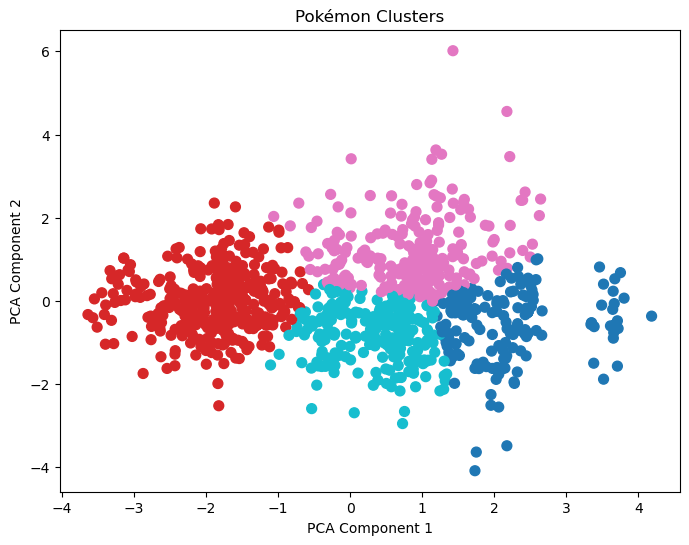

In [51]:
X_2d = pipeline.named_steps['pca'].transform(StandardScaler().fit_transform(stat_cols2))

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=cluster_labels, cmap='tab10', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Pokémon Clusters')
plt.show()

### Trying to Cluster to find patterns

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),        # z-score scale
    ('row_norm', Normalizer(norm='l2')), # pattern-based normalization
    ('pca', PCA(n_components=2)),       # reduce to 2D for visualization
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # 4 clusters
])

#Fit the pipeline
pipeline2.fit(stat_cols2)

#Get Cluster Labels
cluster_labels2 = pipeline2.named_steps['kmeans'].labels_

#Add to full df
poke['cluster2'] = cluster_labels2

#decide what each cluster is
cluster_summary2 = poke.groupby('cluster2')[['hp','attack','defense','sp_attack','sp_defense','speed']].median()
print("Cluster summary (average stats):")
cluster_summary2



Cluster summary (average stats):


,hp,attack,defense,sp_attack,sp_defense,speed
cluster2,,,,,,
0,88.5,100.0,88.0,93.5,90.0,85.0
1,50.0,53.5,49.5,45.0,48.0,50.0
2,75.0,90.0,95.0,60.0,80.0,45.0
3,68.0,80.0,60.0,85.0,70.0,100.0


In [65]:
cluster_to_class = {
    0: 'Tank', 
    1: 'Underpowered', 
    2: 'balanced', 
    3: 'Fast Sweeper'
}
poke['class'] = poke['cluster2'].map(cluster_to_class)

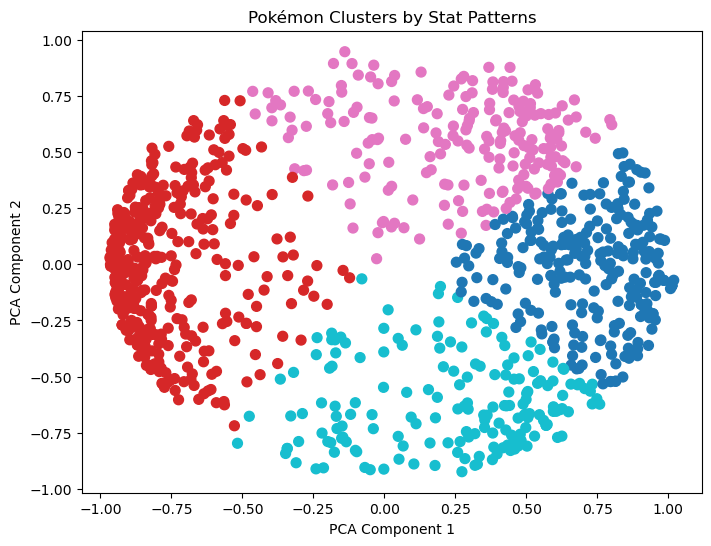

In [66]:
X_2d_2 = pipeline2.named_steps['pca'].transform(
    Normalizer(norm='l2').fit_transform(StandardScaler().fit_transform(stat_cols2))
)

plt.figure(figsize=(8,6))
plt.scatter(X_2d_2[:,0], X_2d_2[:,1], c=cluster_labels2, cmap='tab10', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Pokémon Clusters by Stat Patterns')
plt.show()

/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_68232/791999226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_68232/791999226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_68232/791999226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/7s/y9x1947x0rb6cvrnhd8fms580000gn/T/ipykernel_68232/791999226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

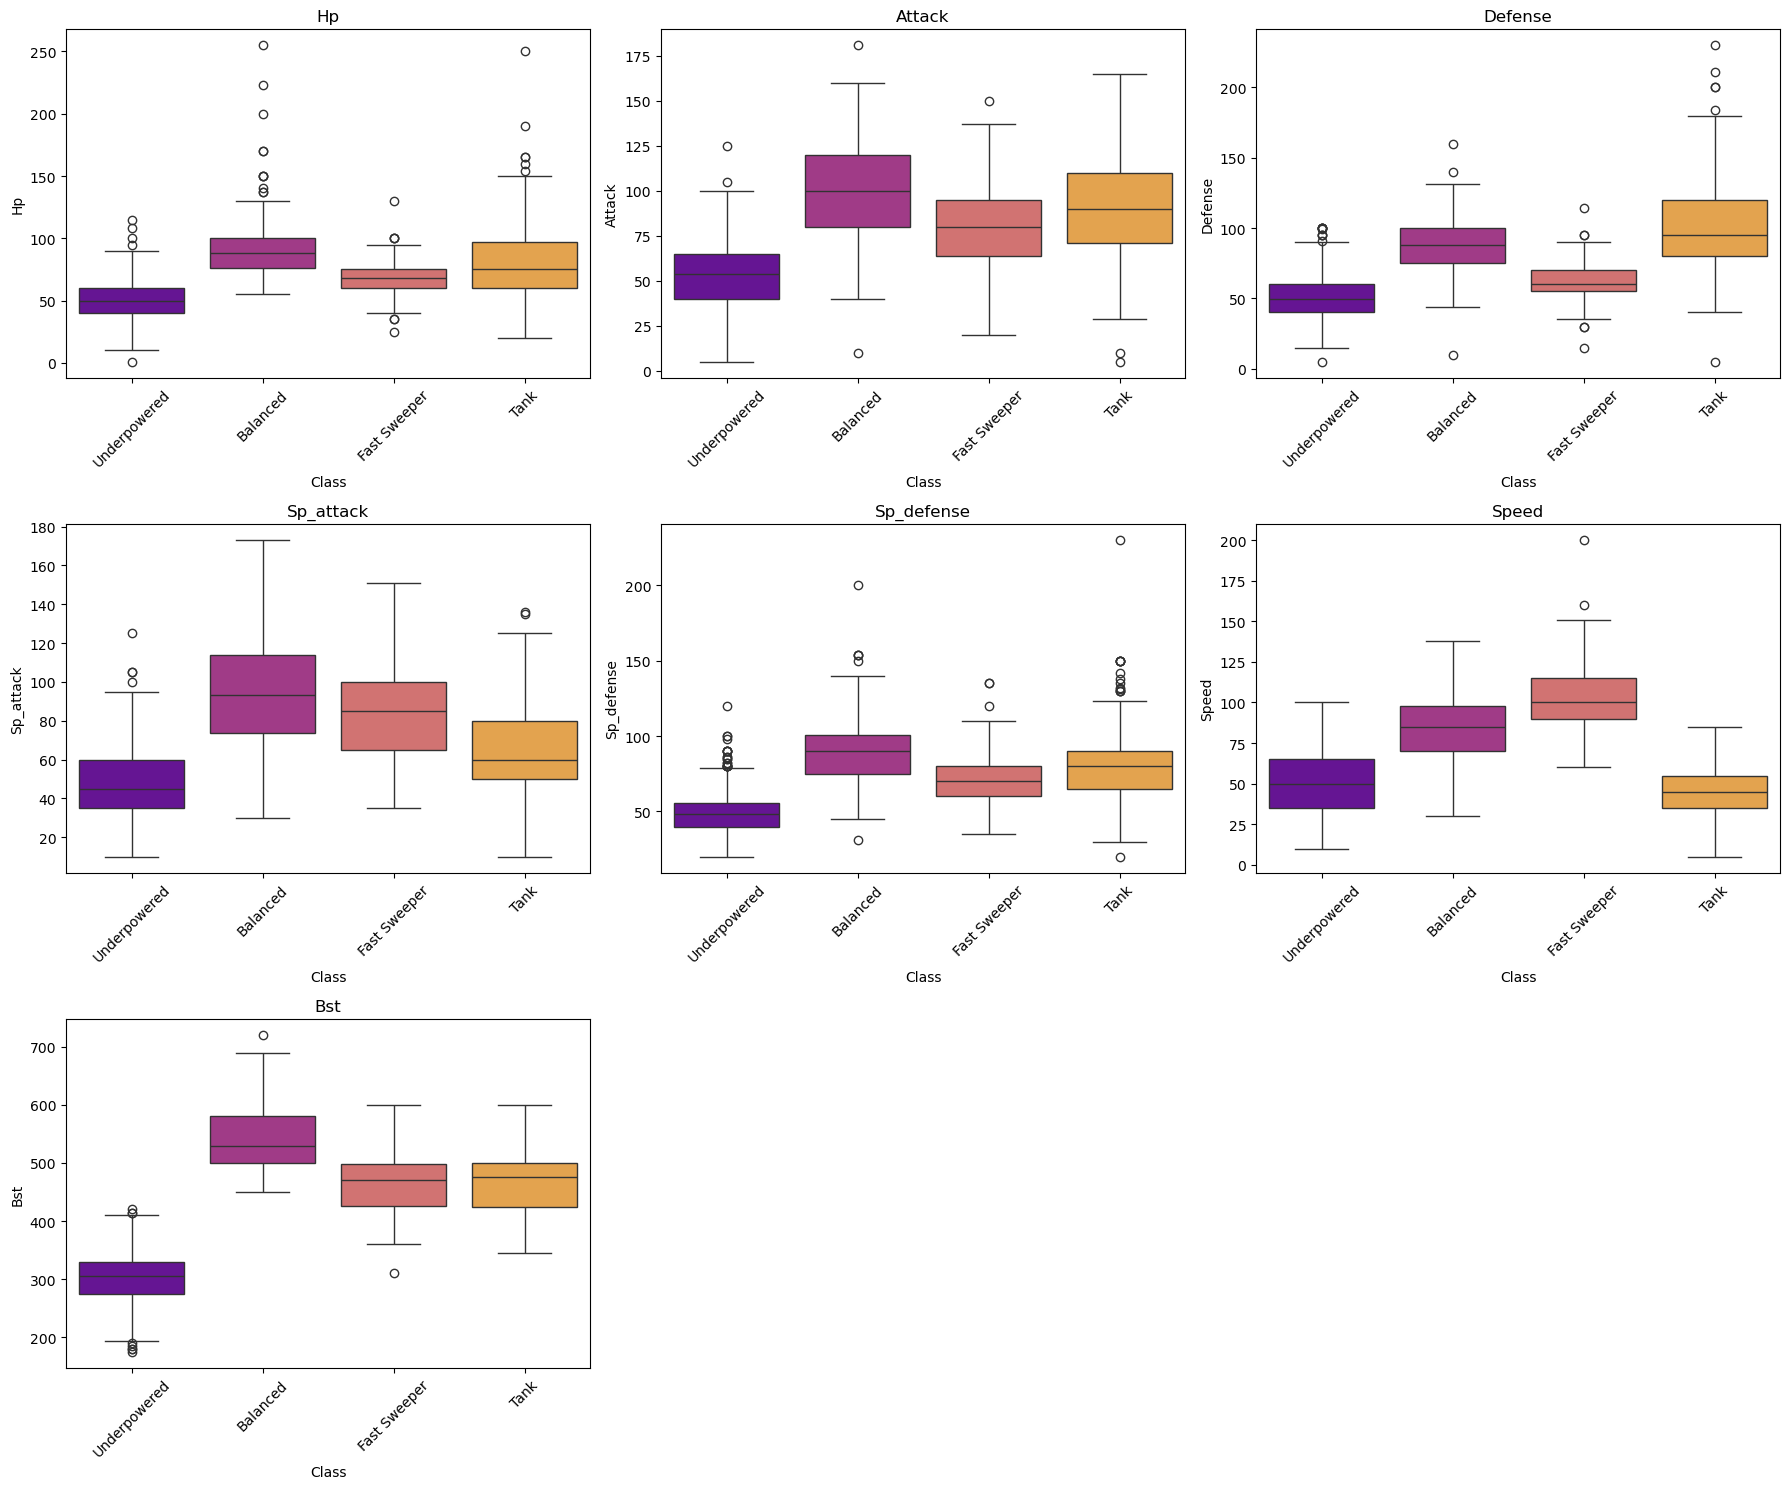

In [61]:
#Visualize the classes for each stat

stats = stat_cols.columns
n_stats = len(stats)

n_cols = 3                      # columns in grid
n_rows = math.ceil(n_stats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()           # make indexing easy

for i, stat in enumerate(stats):
    sns.boxplot(
        x='class',
        y=stat,
        data=poke,
        palette='plasma',
        ax=axes[i]
    )
    axes[i].set_title(stat.capitalize())
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(stat.capitalize())
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [73]:
poke.to_csv('pokemon_dataset_with_classes.csv', index=False)